In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import mason_functions as mf

from sklearn.model_selection import TimeSeriesSplit

import acquire
import prepare

# plotting defaults
plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size = 16)

# Exploration Exercises

In [2]:
#load data
sf = prepare.prep_tssf()
sf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  int64  
 7   item_upc14     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_id       913000 non-null  int64  
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  day_of_week    913000 non-null  int64  
 15  stringday      913000 non-null  object 
 16  sales_total    913000 non-nu

In [3]:
sf.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,Tuesday,308.48
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,197.55
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,25.16


In [4]:
#group by store and then item, look at sale dates
first_sale = sf.reset_index().groupby(['store_id', 'item_id']).sale_date.min()
first_sale.head(51)

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
          6         2013-01-01 00:00:00+00:00
          7         2013-01-01 00:00:00+00:00
          8         2013-01-01 00:00:00+00:00
          9         2013-01-01 00:00:00+00:00
          10        2013-01-01 00:00:00+00:00
          11        2013-01-01 00:00:00+00:00
          12        2013-01-01 00:00:00+00:00
          13        2013-01-01 00:00:00+00:00
          14        2013-01-01 00:00:00+00:00
          15        2013-01-01 00:00:00+00:00
          16        2013-01-01 00:00:00+00:00
          17        2013-01-01 00:00:00+00:00
          18        2013-01-01 00:00:00+00:00
          19        2013-01-01 00:00:00+00:00
          20        2013-01-01 00:00:00+00:00
          21        2013-01-01 00:00:00+00:00
          22    

In [5]:
#group by datetime and look at sum of sales
by_date = sf.groupby('sale_date').sale_amount.sum().reset_index()
by_date.head()

,sale_date,sale_amount
0,2013-01-01 00:00:00+00:00,13696.0
1,2013-01-02 00:00:00+00:00,13678.0
2,2013-01-03 00:00:00+00:00,14488.0
3,2013-01-04 00:00:00+00:00,15677.0
4,2013-01-05 00:00:00+00:00,16237.0


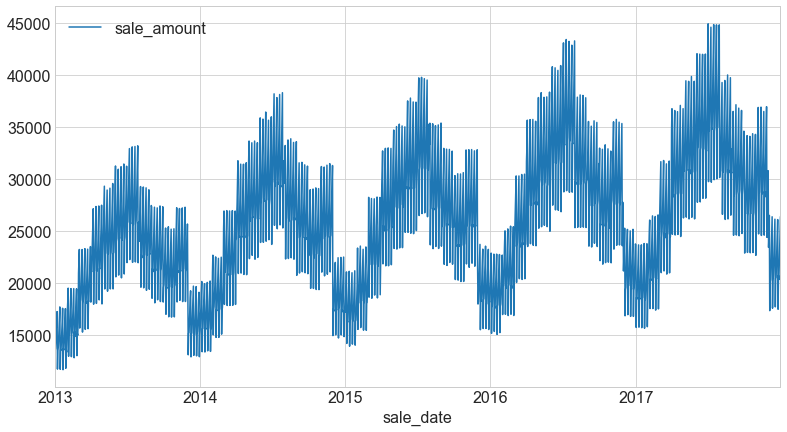

In [6]:
#plot sum of sales by day
by_date.plot(x = 'sale_date', y = 'sale_amount');

Opting with a percentage based split to explore data set.

In [7]:
#split train and test

#set training size
train_size = .8

#set n (number of observations)
n = sf.shape[0]

#mark start of test index
test_index_start = round(train_size * n)

#set train and test
train = sf[: test_index_start]
test = sf[test_index_start:]

#split train and validate

#set training size
train_size = .7

#set n (number of observations)
n = train.shape[0]

#mark start of validate index
validate_index_start = round(train_size * n)

#set validate and then train
validate = train[validate_index_start:]
train = train[: validate_index_start]

In [8]:
#verify shapes
train.shape, validate.shape, test.shape

((511280, 17), (219120, 17), (182600, 17))

In [9]:
#verify sum of records
train.shape[0] + validate.shape[0] + test.shape[0] == len(sf)

True

In [10]:
#a look at last records on train set (cannot overlap with validate set)
train.tail(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2015-10-20 00:00:00+00:00,31.0,479435,Morton,27,Morton Kosher Salt Coarse,6.01,24600017008,24600017008,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,10,1,Tuesday,186.31
2015-10-20 00:00:00+00:00,63.0,360745,Usda Produce,20,Plums Black,5.62,204040000000,204040000000,15000 San Pedro Ave,San Antonio,8,TX,78232,10,1,Tuesday,354.06


In [11]:
#a look at first records on validate set (cannot overlap with train set)
validate.head(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2015-10-20 00:00:00+00:00,31.0,37543,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10,1,Tuesday,75.33
2015-10-20 00:00:00+00:00,32.0,430133,Smart Living,24,Smart Living Charcoal Lighter Fluid,5.34,688267084225,688267084225,1015 S WW White Rd,San Antonio,6,TX,78220,10,1,Tuesday,170.88


In [12]:
#a look at last records on validate set (cannot overlap with test set)
validate.tail(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2016-12-31 00:00:00+00:00,26.0,5113,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,12,5,Saturday,21.84
2016-12-31 00:00:00+00:00,45.0,333793,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,12,5,Saturday,33.30


In [13]:
#a look at first records on test set (cannot overlap with validate set)
test.head(2)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2016-12-31 00:00:00+00:00,44.0,627779,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,516 S Flores St,San Antonio,4,TX,78204,12,5,Saturday,228.36
2016-12-31 00:00:00+00:00,88.0,644213,Deerfields Gluten Free,36,Rice Bran Gluten Free Dinner Rolls Plain,7.95,610358991525,610358991525,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,12,5,Saturday,699.60


The split almost looks good, but there is overlap when it comes to different sets dipping into the same day.

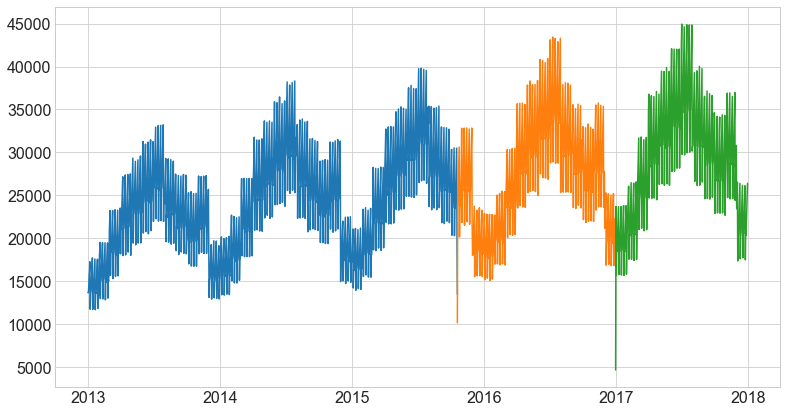

In [14]:
#set up plotting data
train_by_day = train.groupby('sale_date').sale_amount.sum().reset_index()
validate_by_day = validate.groupby('sale_date').sale_amount.sum().reset_index()
test_by_night = test.groupby('sale_date').sale_amount.sum().reset_index()

#visualize
plt.plot(train_by_day.sale_date, train_by_day.sale_amount)
plt.plot(validate_by_day.sale_date, validate_by_day.sale_amount)
plt.plot(test_by_night.sale_date, test_by_night.sale_amount)
plt.show();

The overlap can be seen here in the color dips.

In [15]:
train_by_day.tail()

,sale_date,sale_amount
1018,2015-10-16 00:00:00+00:00,26984.0
1019,2015-10-17 00:00:00+00:00,28702.0
1020,2015-10-18 00:00:00+00:00,30511.0
1021,2015-10-19 00:00:00+00:00,20182.0
1022,2015-10-20 00:00:00+00:00,13504.0


In [16]:
validate_by_day.head()

,sale_date,sale_amount
0,2015-10-20 00:00:00+00:00,10176.0
1,2015-10-21 00:00:00+00:00,23677.0
2,2015-10-22 00:00:00+00:00,25347.0
3,2015-10-23 00:00:00+00:00,27057.0
4,2015-10-24 00:00:00+00:00,28733.0


In [17]:
validate_by_day.tail()

,sale_date,sale_amount
434,2016-12-27 00:00:00+00:00,19341.0
435,2016-12-28 00:00:00+00:00,19560.0
436,2016-12-29 00:00:00+00:00,21111.0
437,2016-12-30 00:00:00+00:00,22296.0
438,2016-12-31 00:00:00+00:00,19094.0


In [18]:
test_by_night.head()

,sale_date,sale_amount
0,2016-12-31 00:00:00+00:00,4698.0
1,2017-01-01 00:00:00+00:00,23709.0
2,2017-01-02 00:00:00+00:00,15772.0
3,2017-01-03 00:00:00+00:00,18650.0
4,2017-01-04 00:00:00+00:00,18510.0


In [19]:
train.tail(1).index

DatetimeIndex(['2015-10-20 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='sale_date', freq=None)

In [20]:
validate.tail(1).index

DatetimeIndex(['2016-12-31 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='sale_date', freq=None)

In [22]:
test.head(1).index

DatetimeIndex(['2016-12-31 00:00:00+00:00'], dtype='datetime64[ns, UTC]', name='sale_date', freq=None)

In [28]:
#assign new train, validate, test so that there is no day overlap
train = sf[:'2015-10-20 00:00:00+00:00']
validate = sf['2015-10-21 00:00:00+00:00': '2016-12-31 00:00:00+00:00']
test = sf['2017-01-01 00:00:00+00:00':]

In [29]:
#verify new shapes
train.shape, validate.shape, test.shape

((511500, 17), (219000, 17), (182500, 17))

In [30]:
#verify sum of observations
train.shape[0] + validate.shape[0] + test.shape[0]

913000

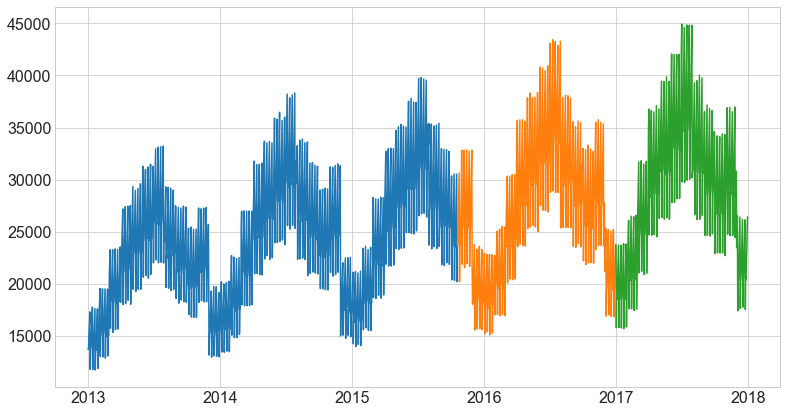

In [35]:
#set up plotting data
train_by_day = train.groupby('sale_date').sale_amount.sum().reset_index()
validate_by_day = validate.groupby('sale_date').sale_amount.sum().reset_index()
test_by_night = test.groupby('sale_date').sale_amount.sum().reset_index()

#visualize
plt.plot(train_by_day.sale_date, train_by_day.sale_amount)
plt.plot(validate_by_day.sale_date, validate_by_day.sale_amount)
plt.plot(test_by_night.sale_date, test_by_night.sale_amount)
plt.show();

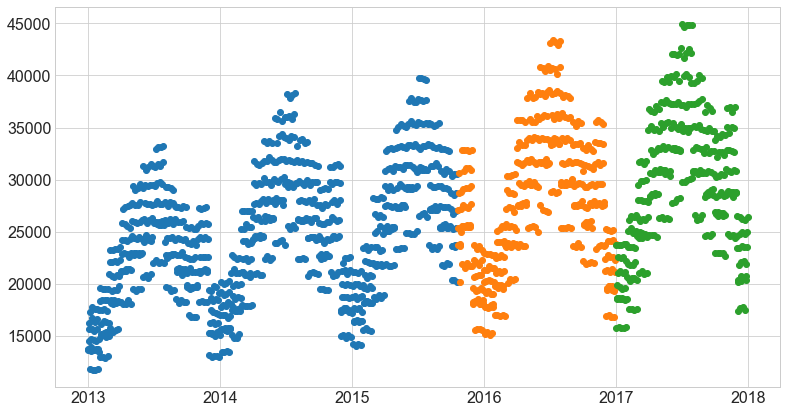

In [62]:
#visualize
plt.scatter(train_by_day.sale_date, train_by_day.sale_amount)
plt.scatter(validate_by_day.sale_date, validate_by_day.sale_amount)
plt.scatter(test_by_night.sale_date, test_by_night.sale_amount)
plt.show();

Onward!

In [37]:
y = train.sale_amount

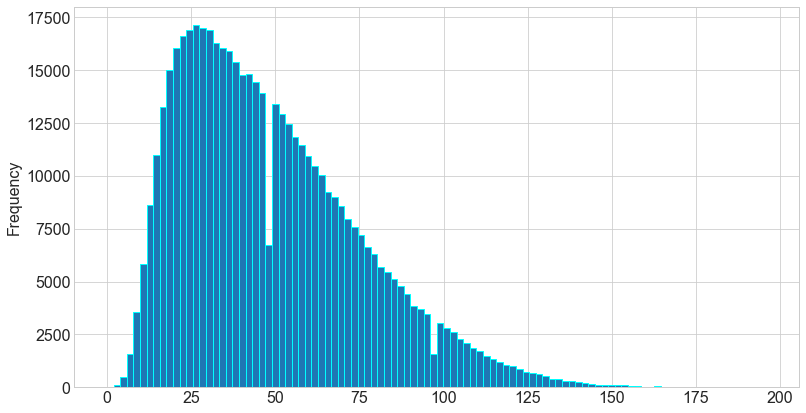

In [55]:
#plot distribution of target variable
y.plot.hist(bins = 100, ec = 'cyan');

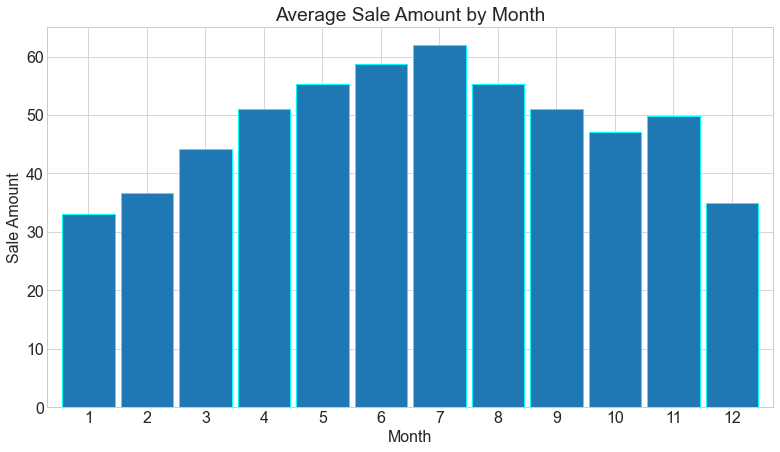

In [53]:
#plot average sale amount by month
ax = y.groupby(train.month).mean().plot.bar(width = .9, ec = 'cyan')
plt.xticks(rotation = 0)
ax.set(title = 'Average Sale Amount by Month', xlabel = 'Month', ylabel = 'Sale Amount');